### Домашнее задание Transformers Training (50 баллов)

В этом домашнем задании требуется обучить несколько Transformer-based моделей в задаче машинного перевода. Для обучения можно воспользоваться текущим проектом, так и реализовать свой пайплайн обучения. Если будете использовать проект, теги **TODO** проекта отмечают, какие компоненты надо реализовать.
В ноутбуке нужно только отобразить результаты обучения и выводы. Архитектура модели(количетсво слоев, размерность и тд) остается на ваш выбор.

Ваш код обучения нужно выложить на ваш github, в строке ниже дать ссылку на него. В первую очередь будут оцениваться результаты в ноутбуке, код нужен для проверки адекватности результатов. 

Обучать модели до конца не нужно, только для демонстрации, что модель обучается и рабочая - снижение val_loss, рост bleu_score.

#### Сcылка на ваш github с проектом(вставить свой) - https://github.com/everdark00/DLs10.git

Ноутбук с результатами выкладывать на ваш **google диск** курса. 

### Данные

`
wget https://www.manythings.org/anki/rus-eng.zip && unzip rus-eng.zip
`

Модели нужно обучить на задаче перевода с английского на русский. 

### Обучение Seq2seq Transformer модель(25 баллов)

Реализуйте Seq2seq Transformer. В качестве блока трансформера можно использовать https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html. В качестве токенизатора воспользуйтесь HuggingFace токенизатор для source/target языков - https://huggingface.co/docs/transformers/fast_tokenizers
В качестве максимальной длинны возьмите предложения длинной **до 15 слов**, без каких либо префиксов. 

Не забудьте остальные элементы модели:
* Мы можем использовать 1 трансформер как энкодер - декодером будет выступать линейный слой. 
* Обучите свой BPE токенизатор - https://huggingface.co/docs/transformers/fast_tokenizers
* Матрицу эмбеддингов токенов
* Матрицу позицонных эмбеддингов
* Линейный слой проекции в target словарь
* Функцию маскирования будущих состояний attention, так как модель авто-регрессионна
* Learning rate schedualer


В качестве результатов, приложите слудующие данные:
1) Параметры обучения - learning rate, batch_size, epoch_num, размерность скрытого слоя, количетсво слоев
2) Графики обучения - train loss, val loss, bleu score
3) Примеры переводов вашей модели(10 штук) - source text, true target text, predicted target text

In [1]:
import torch
import yaml
import os
from models import trainer
from data.datamodule import DataManager
from txt_logger import TXTLogger
from models.seq2seq_transformer import Seq2SeqTransformer

path = "C:/Users/peter/anaconda3/envs/cv/Scripts/pytorch-machine-translation-hw"

if torch.cuda.is_available():
    DEVICE = "cuda"
else:
    DEVICE = 'cpu'

data_config = yaml.load(open(os.path.join(path, "configs/data_config.yaml"), 'r'),   Loader=yaml.Loader)
dm = DataManager(data_config, DEVICE)
train_dataloader, dev_dataloader = dm.prepare_data()

model_config = yaml.load(open(os.path.join(path, "configs/model_config.yaml"), 'r'),   Loader=yaml.Loader)

# TODO: Инициализируйте модель Seq2SeqTransformer
model = Seq2SeqTransformer(device=DEVICE,
                          embedding_size=model_config["embedding_size"],
                          num_encoder_layers=model_config["num_encoder_layers"],
                          dim_feedforward=model_config["hidden_size"],
                          src_voc_size=len(dm.source_tokenizer.tokenizer.get_vocab()),
                          trg_voc_size=len(dm.target_tokenizer.tokenizer.get_vocab()),
                          target_tokenizer=dm.target_tokenizer,
                          source_tokenizer=dm.source_tokenizer,
                          lr_decay_step=model_config["epoch_num"]/5,
                          lr = model_config["lr"],
                          lr_decay=model_config["lr_decay"]
                          )

logger = TXTLogger('training_logs')
trainer_cls = trainer.Trainer(model=model, model_config=model_config, logger=logger)

if model_config['try_one_batch']:
    train_dataloader = [list(train_dataloader)[0]]
    dev_dataloader = [list(val_dataloader)[0]]

trainer_cls.train(train_dataloader, dev_dataloader)

Reading from file: 100%|████████████████████████████████████████████████████████████████████████████████████████| 496059/496059 [00:07<00:00, 63720.36it/s]


175439


  3%|███▊                                                                                                                | 1/30 [03:16<1:34:45, 196.07s/it]

tr_loss: 3.1030430665533437, val_loss: 3.3362959649441017, bleu: 0.0
Current BLEU:  0.0
том мне ничего не говорил ---> том никогда не не не
мэри погладила рубашки тома ---> мэри мэри тома
хватит обвинять во всём тома ---> кто с тома тома
том сказал что боится щекотки ---> том сказал что был
том заставил себя заговорить ---> том в
##############################


  7%|███████▋                                                                                                            | 2/30 [06:32<1:31:38, 196.37s/it]

tr_loss: 2.223825092085297, val_loss: 2.936172862122529, bleu: 0.0
Current BLEU:  0.0
можно у тебя словарь одолжить ---> можно я твой твой
иди прямо по этой улице ---> идите на это это
будет снежная буря ---> есть будет быть
том хотел покинуть австралию ---> том хотел в в
я восхищаюсь вашей реши мо стью ---> я с твой как
##############################


 10%|███████████▌                                                                                                        | 3/30 [09:49<1:28:32, 196.77s/it]

tr_loss: 1.8870175252095502, val_loss: 2.6946027070066356, bleu: 0.0
Current BLEU:  0.0
я всё делаю неправильно ---> я всё всё всё
спасибо что вы пригласили меня ---> спасибо что мне меня
прошу вас ближе к делу ---> пожалуйста пожалуйста в
сал ют начнётся после наступления темноты ---> у будет
я хотел иметь детей ---> мне хотел быть надо
##############################


 13%|███████████████▍                                                                                                    | 4/30 [13:07<1:25:27, 197.22s/it]

tr_loss: 1.6930453006853923, val_loss: 2.597381006192117, bleu: 0.01653344880722375
Current BLEU:  0.01653344880722375
гении тоже совершают ошибки ---> как хорошо хорошо
спасибо пожалуйста ---> спасибо что что
к счастью я успел вовремя ---> стые я была
почему на меня наде вают наручники ---> почему я я
ты работала вчера ночью ---> ты был на
##############################


 17%|███████████████████▎                                                                                                | 5/30 [16:26<1:22:24, 197.79s/it]

tr_loss: 1.5551681956488541, val_loss: 2.4840218281223825, bleu: 0.01653344880722375
Current BLEU:  0.01653344880722375
я знал что это случится ---> я знал что это это
у вас много друзей ---> у тебя из
том не играет в теннис ---> том не в в
небо сегодня хму рое ---> сегодня сегодня сегодня
это прозвучало несколько отчая нно ---> это то немного
##############################


 20%|███████████████████████▏                                                                                            | 6/30 [19:45<1:19:17, 198.24s/it]

tr_loss: 1.4476734119430932, val_loss: 2.382634719792944, bleu: 0.005224533844739199
Current BLEU:  0.005224533844739199
она вернулась из поездки ---> она бы из
том любит смотреть баскетбол ---> том любит за
она далеко не красавица ---> она из из из
ты уроки делаешь ---> ты твои
было предло жено три варианта ---> три были были
##############################


 23%|███████████████████████████                                                                                         | 7/30 [23:04<1:16:06, 198.53s/it]

tr_loss: 1.3584002310727659, val_loss: 2.3277199364056553, bleu: 0.005224533844739199
Current BLEU:  0.005224533844739199
всё выглядит таким вкусным ---> всё выглядит так
сними шко льную форму ---> возьми с в школу
насилие порождает насилие ---> как будьте
ты не сильно изменился ---> ты не не
он присутствовал на многих це ре мо ния х ---> он много много много
##############################


 27%|██████████████████████████████▉                                                                                     | 8/30 [26:24<1:12:55, 198.91s/it]

tr_loss: 1.2811388703183684, val_loss: 2.29859818463778, bleu: 0.0173932960802299
Current BLEU:  0.0173932960802299
том помог ранено му ---> том помог человек
куда том ходил купаться ---> куда том чтобы
том думает что мэри ушла ---> том думает что мэри мэри
какая твоя любимая заку ска ---> какой у тебя себя
кто ваш любимый композитор ---> кто ваш тебя
##############################


 30%|██████████████████████████████████▊                                                                                 | 9/30 [29:43<1:09:40, 199.05s/it]

tr_loss: 1.2122231430646606, val_loss: 2.243429871806263, bleu: 0.0234375
Current BLEU:  0.0234375
состояние улуч шается ---> ету жена
он действительно такой ценный ---> это действительно так
я помню когда это случилось ---> я помню когда это случилось
делай как считаешь нужным ---> вы что ты дома
свидетелей не было ---> не не было
##############################


 33%|██████████████████████████████████████▎                                                                            | 10/30 [33:04<1:06:31, 199.59s/it]

tr_loss: 1.1511719370279512, val_loss: 2.2078868503118083, bleu: 0.0460553299249691
Current BLEU:  0.0460553299249691
мне очень понравилась эта книга ---> мне очень эта эта книга
мать тома канадка ---> у тома мать
том дал маше всё ---> том всё мэри мэри
кем был открыт радий ---> кто был не на
я жалею что покинул австралию ---> я жалею что из австралии
##############################


 37%|██████████████████████████████████████████▏                                                                        | 11/30 [36:25<1:03:20, 200.01s/it]

tr_loss: 1.0956606482959599, val_loss: 2.191288326343481, bleu: 0.0495115676894784
Current BLEU:  0.0495115676894784
она превзо шла все мои ожидания ---> это кату волосы моей моей
он бегло просмотрел отчёт ---> он если на отчёт
я не разбира юсь в эконо ми ке ---> я знаю не не было
вы напра ши ваетесь на неприятности ---> у тебя неприятности
где находится ближай шая аптека ---> где с
##############################


 40%|██████████████████████████████████████████████                                                                     | 12/30 [39:46<1:00:02, 200.14s/it]

tr_loss: 1.0447101031201693, val_loss: 2.1406762543385915, bleu: 0.0364745338447392
Current BLEU:  0.0364745338447392
том знает где ты живёшь ---> том знает где ты живёте
родители с вами ---> твои с вами вами
мы баск ет болист ки ---> мы в
их комнаты всегда чистые ---> их всегда всегда в
солдат действовал смело ---> стену был ещё
##############################


 43%|██████████████████████████████████████████████████▋                                                                  | 13/30 [43:06<56:44, 200.25s/it]

tr_loss: 0.9976149391019572, val_loss: 2.1444701447974155, bleu: 0.034746414962484554
Current BLEU:  0.034746414962484554
обстоятельства изменились ---> у диться у
я забыла чего хотел том ---> я забыл что хотел хотел
том помог с посу дой ---> том помог с посуду
эй ты с этим по осторожнее ---> эй будь с этим этим
я вчера немного при брался ---> я вчера вчера вчера
##############################


 47%|██████████████████████████████████████████████████████▌                                                              | 14/30 [46:27<53:27, 200.46s/it]

tr_loss: 0.9550111020491573, val_loss: 2.096826952304283, bleu: 0.015780350222473906
Current BLEU:  0.015780350222473906
эти бананы вкусные ---> те очень очень
где я могу купить спе ц одежду ---> где я могу купить
когда ты завтра каешь ---> когда ты тает
том научил меня терпе нию ---> том тома меня меня
эти люди говорят по французски ---> те мужчины говорят по французски
##############################


 50%|██████████████████████████████████████████████████████████▌                                                          | 15/30 [49:47<50:05, 200.39s/it]

tr_loss: 0.9147329894433591, val_loss: 2.1027669010371186, bleu: 0.0434673637697083
Current BLEU:  0.0434673637697083
мы уже добрые друзья ---> мы уже друзья друзья
том назвал своего хомя чка куки ---> том назвал свою потороплюсь
я слышал о твоей болезни ---> я слышал о своём мнение
том выключил фары ---> том включил свет
наш учитель выглядел удивлённым ---> наш наш казался удивлён
##############################


 53%|██████████████████████████████████████████████████████████████▍                                                      | 16/30 [53:07<46:43, 200.23s/it]

tr_loss: 0.8787528931170893, val_loss: 2.0676527236499926, bleu: 0.0364745338447392
Current BLEU:  0.0364745338447392
прими пожалуйста этот небольшой подарок ---> пожалуйста принимаю этот пожалуйста
у нас состоя лся небольшой спор ---> у нас был немного
комментариев пока нет ---> ещё ещё нет
для всех студентов вход свободный ---> все студенты студенты
демо кратия поо щ ряет свободу ---> дня из чего от
##############################


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 17/30 [56:28<43:26, 200.51s/it]

tr_loss: 0.8448696410862445, val_loss: 2.068289417855061, bleu: 0.0338865676894784
Current BLEU:  0.0338865676894784
не всё ещё в порядке ---> что то не не так
он слушал музыку ---> он был музыку музыку
вы делаете большие успехи ---> ты хорошая успехи
длина этой реки восемь сот километ ров ---> эта река вчера регбистом
сегодня утром ты опоздала ---> ты опоздал этот сегодня
##############################


 60%|██████████████████████████████████████████████████████████████████████▏                                              | 18/30 [59:49<40:05, 200.45s/it]

tr_loss: 0.8131601242662672, val_loss: 2.035363935641129, bleu: 0.04778344880722375
Current BLEU:  0.04778344880722375
два места остались не занятыми ---> два два ложь
том заглянул под диван ---> том посмотрел под нём
том считает что мэри лжёт ---> том верит мэри мэри
том выглядел уставшим но счастливым ---> том выглядел уставшим но счастливым
здесь об гон запрещён ---> разжёг здесь здесь
##############################


 63%|████████████████████████████████████████████████████████████████████████▊                                          | 19/30 [1:03:08<36:41, 200.16s/it]

tr_loss: 0.7842800115169779, val_loss: 2.0166740839498756, bleu: 0.034746414962484554
Current BLEU:  0.034746414962484554
провода прово дят электричество ---> возможно на на это
у тома аллергия на клубнику ---> у тома аллергия на
все видели что произошло ---> все видели что случилось
тебя все искали ---> все вас свободны
том взглянул на остальных ---> том бросил на остальных
##############################


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 20/30 [1:06:29<33:23, 200.30s/it]

tr_loss: 0.7565405783375068, val_loss: 2.0423007798891, bleu: 0.026373805478215218
Current BLEU:  0.026373805478215218
правила надо изменить ---> правила быть надо
том никогда нас не преда ст ---> том никогда никогда не нас
помоги мне почистить картошку ---> помогите мне почисти картошку
том приехал около половины третьего ---> том приехал в
это случилось совершенно случайно ---> это было совершенно в
##############################


 70%|████████████████████████████████████████████████████████████████████████████████▌                                  | 21/30 [1:09:49<30:02, 200.25s/it]

tr_loss: 0.7312324888725767, val_loss: 2.032358661185216, bleu: 0.0729490676894784
Current BLEU:  0.0729490676894784
спасибо что выручили меня ---> спасибо что помогает мне
это переходный глагол ---> это порвала сонату
том вызвал скорую ---> том позвонил позвонил
я ищу батарейки ---> я ищу личного
том ехал верхом без седла ---> том уютно лошадь лошадь
##############################


 73%|████████████████████████████████████████████████████████████████████████████████████▎                              | 22/30 [1:13:09<26:41, 200.18s/it]

tr_loss: 0.7066518523091061, val_loss: 2.027184383712546, bleu: 0.031298601534217596
Current BLEU:  0.031298601534217596
он почти никогда не злится ---> он почти никогда не злится
сейчас это очень важно ---> это это очень важно
мы сами у краси ли комнату ---> мы мы комнату
мы были засти гнуты врасплох ---> мы были на
том вчера был на работе ---> том вчера был работает
##############################


 77%|████████████████████████████████████████████████████████████████████████████████████████▏                          | 23/30 [1:16:29<23:21, 200.28s/it]

tr_loss: 0.6846804635679059, val_loss: 2.0194463529726017, bleu: 0.0495115676894784
Current BLEU:  0.0495115676894784
мы используем другой матери ал ---> мы будем идеально
я говорил не по французски ---> я не говорил по французски
я хочу знать всё ---> я хочу всё всё
это абсолютно невозможно ---> это совершенно невозможно
никто нам ничего не сказал ---> нам нам ничего не говорил
##############################


 80%|████████████████████████████████████████████████████████████████████████████████████████████                       | 24/30 [1:19:50<20:01, 200.26s/it]

tr_loss: 0.6635480675245266, val_loss: 2.037468309385063, bleu: 0.031298601534217596
Current BLEU:  0.031298601534217596
мэри вырастила пятерых детей ---> мэри поднял пять детей
все рассмеялись кроме тома ---> все смеялись кроме томом
поверни направо пожалуйста ---> сделай направо пожалуйста
у тома заколотилось сердце ---> у тома сердце
том выглядит крайне смущен ным ---> том выглядит выглядит придёт
##############################


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                   | 25/30 [1:23:09<16:40, 200.13s/it]

tr_loss: 0.6443483532833423, val_loss: 2.0177965786335244, bleu: 0.08420938111774535
Current BLEU:  0.08420938111774535
кто нибудь видит разницу ---> кто нибудь нибудь кого
я запомню этот вечер ---> я вечером сегодня вечером
они испыты вают новое оборудование ---> они в работе новые
они не могли защитить себя ---> они не могли хотели покончено
мой парень собственник ---> моя меня лето
##############################


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▋               | 26/30 [1:26:30<13:21, 200.31s/it]

tr_loss: 0.6258717191523602, val_loss: 2.017055241295891, bleu: 0.10066405421866312
Current BLEU:  0.10066405421866312
полити кам следует держать свои обещания ---> телепат надо свои их
найди себе приличный костюм ---> найди себе месяцев костюм
том отлично говорит по французски ---> том говорит говорит по французски
эй н штей н был математи чески м гением ---> увидимся в в в жут в
каково сейчас состояние ---> что сейчас ситуация
##############################


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 27/30 [1:29:50<10:00, 200.22s/it]

tr_loss: 0.6077781270989093, val_loss: 2.0210813205607616, bleu: 0.0286620338447392
Current BLEU:  0.0286620338447392
ты сам себя ограни чи ваешь ---> ты сам сами
цветы всегда жела н ны ---> цветы всегда наелась
эти брюки слишком длинные ---> эти брюки слишком длинные
тебе нравится древняя история ---> вам нравится нравится историю
три солдата были ранены ---> трое были были ранен
##############################


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 28/30 [1:33:10<06:40, 200.00s/it]

tr_loss: 0.5919632046952938, val_loss: 2.0339759048754282, bleu: 0.03407868645882921
Current BLEU:  0.03407868645882921
я думал ты лжёшь ---> я думал вы врёшь
почему ты нас обманул ---> почему ты нас нас
водитель открыл дверь ---> провинился дверь дверь
вы праздну ете рождество ---> вы рождество рождество
том принялся флирто вать с мэри ---> том начал с мэри мэри
##############################


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 29/30 [1:36:30<03:20, 200.20s/it]

tr_loss: 0.57570965986091, val_loss: 2.032733868073373, bleu: 0.03997094880722375
Current BLEU:  0.03997094880722375
моя сестра гладит мои брюки ---> моя сестра моей моей брюки
я всё объясню потом ---> я потом позже позже
вы любите играть в баскетбол ---> вы любишь играешь в баскетбол
это действительно так важно ---> это действительно так важно
один из ваших соседей пожаловался ---> один из вас соседи
##############################


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [1:39:51<00:00, 199.71s/it]

tr_loss: 0.561330939735623, val_loss: 2.0312200736825483, bleu: 0.10074282992496911
Current BLEU:  0.10074282992496911
пожалуйста включите телевизор ---> включите пожалуйста телевизор
ему насту пили на ногу ---> кто то то на
том режет нож ница ми укро п ---> том без ходит с
осталось всего три штуки ---> есть всего осталось осталось
пожалуйста вернитесь после обеда ---> пожалуйста возвращайся этот той
##############################
Last 29 epoch train loss:  0.561330939735623
Last 29 epoch val loss:  2.0312200736825483
Last 29 epoch val bleu:  0.10074282992496911


In [2]:
model_config

{'embedding_size': 256,
 'num_encoder_layers': 8,
 'hidden_size': 4096,
 'epoch_num': 30,
 'try_one_batch': False,
 'lr': 0.0001,
 'lr_decay': 0.1}

In [3]:
data_config

{'prefix_filter': None,
 'max_length': 5,
 'filename': 'C:/Users/peter/anaconda3/envs/cv/Scripts/pytorch-machine-translation-hw/data/rus.txt',
 'train_size': 0.8,
 'batch_size': 128}

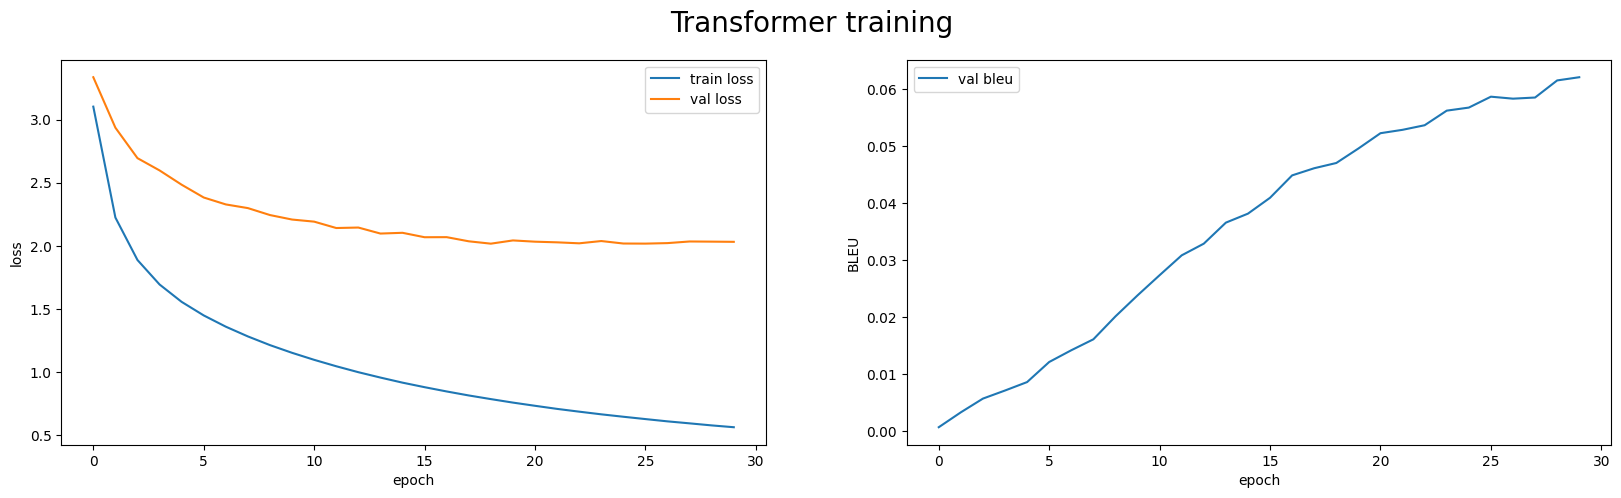

In [4]:
import re
import matplotlib.pyplot as plt
MATCH_REGEX = re.compile(r"[+-]?\b(\d+([.]\d*)?([eE][+-]?\d+)?|[.]\d+([eE][+-]?\d+)?)\b")

def extract_values(string):
    result = dict()
    params = ['val_loss', 'train_loss', 'bleu_score']
    if "train_loss" in string:
        found_vals = [re_match[0] for re_match in re.findall(MATCH_REGEX, string)]
    
        if len(params) == len(found_vals):
            for name, val in zip(params, found_vals):
                result[name] = float(val)
    return result

def plot_results(train_loss_list, val_loss_list, val_bleu_list, run_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    
    ax1.plot(range(len(train_loss_list)), train_loss_list, label='train loss')
    ax1.plot(range(len(val_loss_list)), val_loss_list, label='val loss')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.legend()
    
    ax2.plot(range(len(val_bleu_list)), val_bleu_list, label='val bleu')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('BLEU')
    ax2.legend()
    
    fig.suptitle(run_name, fontsize=20)
    plt.show()

DATAPATH = os.path.join(path, 'training_logs')
progress_file_path = os.path.join(DATAPATH, "progress_log.txt")
file_content = open(progress_file_path, 'r').read().split("\n")

train_loss_list, val_loss_list, val_bleu_list = [], [], []
for line in file_content:
    d = extract_values(line)
    if len(d) > 0:
        train_loss_list.append(d['train_loss'])
        val_loss_list.append(d['val_loss'])
        val_bleu_list.append(d['bleu_score'])
    
        
plot_results(train_loss_list, val_loss_list, val_bleu_list, run_name='Transformer training')

In [20]:
sentences_to_predict = [
    "he is overconfident",
    "she s an emotional person",
    "he is greedy",
    "he is kind",
    "she is kidding",
    "he s watching TV",
    "she is playing with dolls",
    "dog eats meat",
    "children play football",
    "We are going to swim"
]

list(map(" ".join, trainer_cls.translate(sentences_to_predict)))

['он слишком самоуверен',
 'она пока человек',
 'он жадный',
 'он добрый',
 'она шутит',
 'он смотрит',
 'она играет в в',
 'пёс ест мясо',
 'дети играют в футбол',
 'надо плавать']

### Fine-tune pretrained T5 (25 баллов)

Реализуйте Seq2seq Pretrained T5. Воспользуйтесь https://huggingface.co/docs/transformers/model_doc/t5 предобученной моделью. В качестве максимальной длинны возьмите предложения длинной **до 15 слов**, без каких либо префиксов. Архитектура модели(количетсво слоев, размерность и тд) остается на ваш выбор.

Не забудьте важные аспекты обучения модели:
* Взять готовый t5 токенизатор
* Resize matrix embedding - скорей всего ваша матрица эмбеддингов не будет включать эмбеддинги из вашего сета. Пример обновления матрицы эмбеддингов тут тут https://github.com/runnerup96/Transformers-Tuning/blob/main/t5_encoder_decoder.py
* Learning rate schedualer/Adafactor with constant learning rate


В качестве результатов, приложите слудующие данные:
1) Параметры обучения - learning rate, batch_size, epoch_num, pretrained model name
2) Графики обучения - train loss, val loss, bleu score
3) Примеры переводов вашей модели(10 штук) - source text, true target text, predicted target text

In [6]:
# CODE HERE